### Project Description

The project is about building a price prediction model for used car . The dataset is collected from Open Data Nepal. The dataset consists of 12 features:
1. Brand: The brand of the car
2. Model: Car's model
3. Model_year: The year when the car was manufactured
4. Transmission: The transmission allows the vehicle to change gears,
5. Engine_size(cc): the size of an engine refers to the total volume of air and fuel being pushed through the engine by the cylinders. It's measured in cubic centimetres (cc). 
6. Drivetrain: the system in a motor vehicle which connects the transmission to the drive axles. 2WD-Two Wheel Drive and 4WD-Four Wheel Drive
7. Fuel_type: Car fuel type-Petrol or diesel
8. Colour: Color of the car
9. Lot_no: A lot number is an identification number assigned to a particular quantity like car. 
10. Kilometer: distance covered in kilometer
11. Status: used or new car
12. Price: price of the car

### Importing packages

In [ ]:
#import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('used_car_data.csv')
df.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Status,Price
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,200.0,USED,Rs. 975000
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,100.0,USED,Rs. 3000000
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,42000.0,USED,Rs. 975000
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,51000.0,USED,Rs. 3000000
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,Sky Blue,9.0,38000.0,USED,Rs. 1000000


In [ ]:
df.shape

(2217, 12)

In [ ]:
df['Status'].unique()

array(['USED', nan], dtype=object)

#####  Since we know that the vehicles are used vehicle so this column 'Status' has no use.

In [ ]:
df.drop(['Status'], axis='columns', inplace=True)

In [ ]:
df.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,200.0,Rs. 975000
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,100.0,Rs. 3000000
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,42000.0,Rs. 975000
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,51000.0,Rs. 3000000
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,Sky Blue,9.0,38000.0,Rs. 1000000


### Handling Missing Values

In [ ]:
df.isnull().sum()

Brand              316
Model              316
Model_year         316
Transmission       316
Engine_size(cc)    316
Drivetrain         316
Fuel_type          316
Colour             316
Lot_no             316
Kilometer          316
Price              316
dtype: int64

###### There are equal no of missing values in all columns of the dataset. But when I see the dataset I found that these are not missing values but empty rows thatswhy all missing values are equal so we remove the these empty rows.

In [ ]:
cols=['Brand','Model','Model_year','Transmission','Engine_size(cc)','Drivetrain','Fuel_type','Colour','Lot_no','Kilometer','Price']
cols

['Brand',
 'Model',
 'Model_year',
 'Transmission',
 'Engine_size(cc)',
 'Drivetrain',
 'Fuel_type',
 'Colour',
 'Lot_no',
 'Kilometer',
 'Price']

In [ ]:
df.replace('',np.nan, inplace=True)
df.tail()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
2212,Volkswagen,passat,2010.0,Manual,1800.0,2WD,Petrol,black,8.0,11000.0,Rs. 5800000
2213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2214,Volkswagen,tiguan,2010.0,Manual,2000.0,2WD,Petrol,India blue,8.0,25000.0,Rs. 4900000
2215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2216,Volkswagen,vento,2012.0,Manual,1600.0,2WD,Diesel,Silver,11.0,14000.0,Rs. 3555555


In [ ]:
df.dropna(subset=cols,inplace=True)
df.tail()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
2210,Volkswagen,polo,2013.0,Manual,1600.0,2WD,Petrol,Silver,11.0,6300.0,Rs. 2700000
2211,Volkswagen,beetle,2010.0,Manual,1595.0,2WD,Petrol,Maroon Red,8.0,19000.0,Rs. 3950000
2212,Volkswagen,passat,2010.0,Manual,1800.0,2WD,Petrol,black,8.0,11000.0,Rs. 5800000
2214,Volkswagen,tiguan,2010.0,Manual,2000.0,2WD,Petrol,India blue,8.0,25000.0,Rs. 4900000
2216,Volkswagen,vento,2012.0,Manual,1600.0,2WD,Diesel,Silver,11.0,14000.0,Rs. 3555555


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model            1901 non-null   object 
 2   Model_year       1901 non-null   float64
 3   Transmission     1901 non-null   object 
 4   Engine_size(cc)  1901 non-null   float64
 5   Drivetrain       1901 non-null   object 
 6   Fuel_type        1901 non-null   object 
 7   Colour           1901 non-null   object 
 8   Lot_no           1901 non-null   float64
 9   Kilometer        1901 non-null   float64
 10  Price            1901 non-null   object 
dtypes: float64(4), object(7)
memory usage: 178.2+ KB


###### Price is an object datatype that is bacause of the 'Rs.' . Price column has 'Rs' in every row  so we remove 'Rs' and make it integer

In [ ]:
df['Price'] = (df['Price'].str.strip('Rs. ').astype('int64'))
df['Price'].head()

0     975000
1    3000000
2     975000
3    3000000
4    1000000
Name: Price, dtype: int64

###### Here we have both categorical and numerical data. lets separate numerical and categorical into 2 groups

In [ ]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Model_year', 'Engine_size(cc)', 'Lot_no', 'Kilometer', 'Price']

In [ ]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['Brand', 'Model', 'Transmission', 'Drivetrain', 'Fuel_type', 'Colour']

### Numerical data analysis

###### Model is in year date form . lets keep it in number of years (2021-year_date)

In [ ]:
df.loc[:, "Model_year"] = df["Model_year"].apply(lambda x: 2021-x) # Model_year is in year(date) form so converting it into no of year form.
df.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Price
0,Chevrolet,aveo,12.0,Manual,1150.0,2WD,Petrol,golden,6.0,200.0,975000
1,Chevrolet,captiva,6.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,100.0,3000000
2,Chevrolet,aveo,12.0,Manual,1150.0,2WD,Petrol,golden,6.0,42000.0,975000
3,Chevrolet,captiva,11.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,51000.0,3000000
4,Chevrolet,spark,9.0,Manual,1000.0,2WD,Petrol,Sky Blue,9.0,38000.0,1000000


In [ ]:
df[num_features].describe()

,Model_year,Engine_size(cc),Lot_no,Kilometer,Price
count,1901.000000,1901.000000,1901.000000,1901.000000,1.901000e+03
mean,11.560231,1420.210416,8.264598,41094.897422,2.024845e+06
std,4.098546,507.546885,3.223753,38439.454222,1.797278e+06
min,2.000000,624.000000,1.000000,100.000000,2.011000e+03
25%,9.000000,1100.000000,6.000000,25000.000000,1.190000e+06
50%,11.000000,1200.000000,8.000000,36000.000000,1.575000e+06
75%,13.000000,1600.000000,10.000000,50000.000000,2.400000e+06
max,35.000000,4400.000000,22.000000,800000.000000,3.200000e+07


Statistical Analysis:

+ The used car are as old as 35 years and as new as 2 years.
+ All features have mean and median almost equal so we can say that  dataset is perfectly symmetrical distribution.(normal distribution)
+ For the features model_year, Kilometer and price,the difference in 75th percentile and max is too high. That means they have some outlier values.
Since it is a Gaussian distribution so using empirical formula( mean-3*sd, mean, mean+3*sd). The presence of outlier can be determine without calculation

In [ ]:
# corelation analysis
co_relation=df.corr()
co_relation

,Model_year,Engine_size(cc),Lot_no,Kilometer,Price
Model_year,1.000000,0.029666,-0.761381,0.361312,-0.247300
Engine_size(cc),0.029666,1.000000,0.027301,0.219706,0.543577
Lot_no,-0.761381,0.027301,1.000000,-0.263498,0.223766
Kilometer,0.361312,0.219706,-0.263498,1.000000,-0.019350
Price,-0.247300,0.543577,0.223766,-0.019350,1.000000


+ Price has negative corelation with Model_year and Kilometer. 
+ The car with high kilometer travelled is supposed to be very old car over course of time so price should be low.
+ The car manufactured long back ago will have greater model_year but is old so the price should be low.
+ Price has positive corelation with Engine_size and lot_no
+ Engine size higher means expenisve car so price is sufficiently high.
+ lot no is positively corelated to price
+ Model year and Lot no are negatively strong correlated as both represent the age of the vehivle but in opposite way.

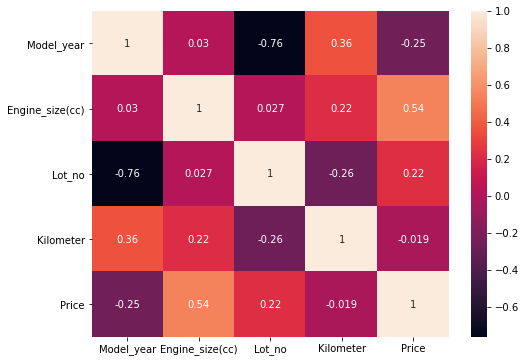

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

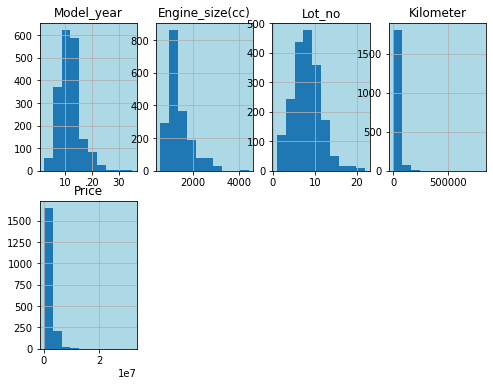

In [ ]:
for i,feature in enumerate(num_features):
    plt.subplot(2,4,i+1 , facecolor='#ADD8E6' )
    df[feature].hist()
    plt.title(feature)

By figure it looks like left skewed but is not as the mean is less than the median.

In [ ]:
# Defining box_plot and scatter plot & kde_plot functions

def make_boxplot(feature):
    plt.rcParams['figure.figsize'] = (8, 6)
    sns.boxplot(x=df[feature])
    

def scatters(col1,col2):
    plt.rcParams['figure.figsize'] = (6, 4)
    fig = px.scatter(df, x=col1, y=col2 )
    return fig.show()

def make_kdeplot(feature) : 
    plt.rcParams['figure.figsize'] = (8, 6)
    sns.kdeplot(df[feature], shade=True)

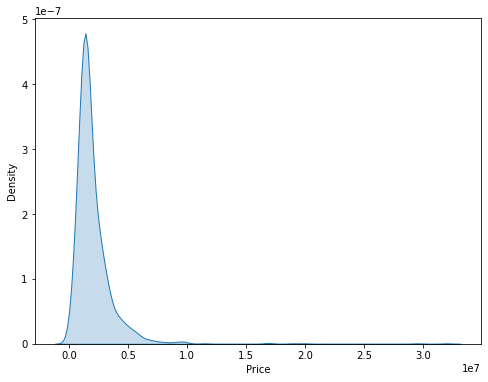

In [ ]:
make_kdeplot('Price')

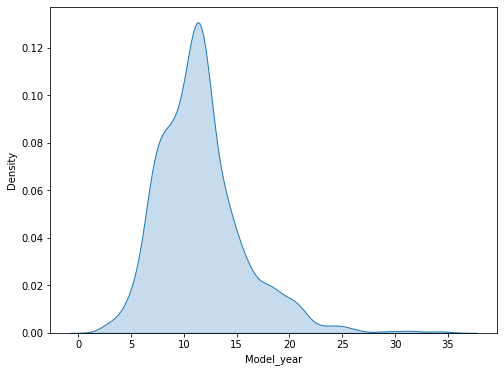

In [ ]:
make_kdeplot('Model_year')

In [ ]:
scatters('Model_year','Price') 

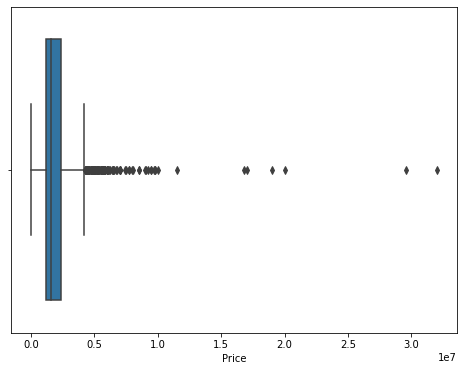

In [ ]:
make_boxplot('Price')

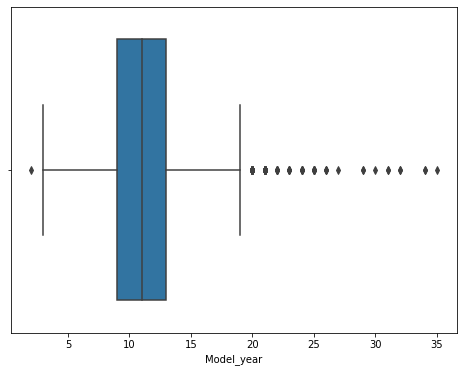

In [ ]:
make_boxplot('Model_year')

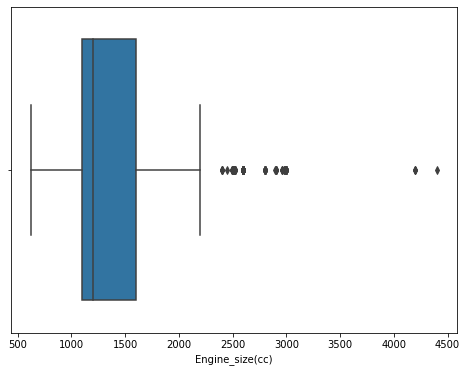

In [ ]:
make_boxplot('Engine_size(cc)')

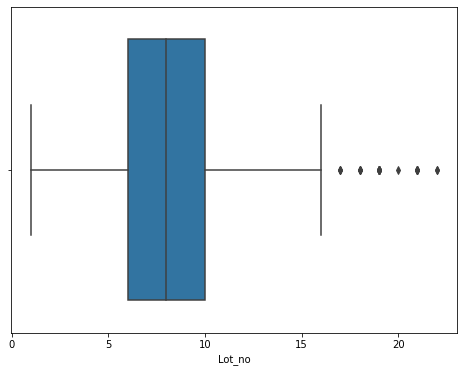

In [ ]:
make_boxplot('Lot_no')

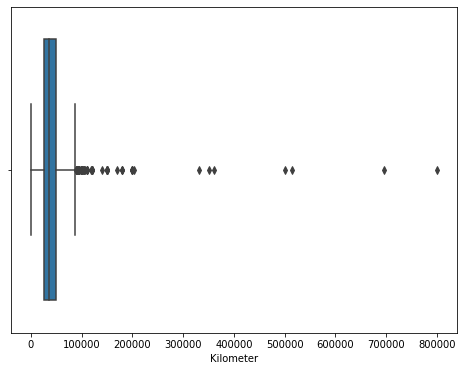

In [ ]:
make_boxplot('Kilometer')

In [ ]:
scatters('Kilometer','Price')

So there are few outliers car that has travelled longer distance but sold at low prices.

In [ ]:
# lets drop lot_no as it is highly corelated to model_year and also the corelation with other feature is similar to model_year
df.drop(['Lot_no'], axis='columns', inplace=True)

### Categorical Data Analysis

In [ ]:
for column in cat_features:
  print('{} has {} values '.format(column,df[column].unique()))
  print('\n')

Brand has ['Chevrolet' 'Fiat' 'Ford' 'Honda' 'Hyundai' 'Kia' 'Land Rover' 'Mahindra'
 'Maruti Suzuki' 'Nissan' 'Skoda' 'Tata' 'Toyota' 'Volkswagen'] values 


Model has ['aveo' 'captiva' 'spark' 'beat' 'u-va' 'uva' 'sedan' 'avventura' 'punto'
 'linea' 'figo' 'palio' 'ecosport' 'titanium' 'fiesta' 'ranger' 'cr-v'
 'city' 'jazz' 'brio' 'civic' 'crv' 'accent' 'i10' 'santro' 'i20' 'getz'
 'asta' 'tucson' 'eon' 'creta' 'elite' 'elantra' 'sonata' 'sephia'
 'sportage' 'picanto' 'rio' 'soul' 'carens' 'cerato' 'freelander'
 'discovery' 'defender' 'bolero' 'Kuv' 'scorpio' 'swift' 'alto-800'
 'celerio' 'alto-LXI' 'Omni' '800' 'eeco' 'astar' 'alto' 'dzire' 'a-star'
 'saloon' 'sunny' 'tiida' 'fabia' 'laura' 'rapid' 'superb' 'octavia'
 'sumo' 'safari' 'ace' 'indica' 'bolt' 'strome' 'nano' 'grande' 'manza'
 'venture' 'indigo' 'corolla' 'fortuner' 'hilux' 'cruiser' 'etios' 'echo'
 'avanza' 'camry' 'corona' 'prado' 'hiace' 'polo' 'tiguan' 'beetle'
 'vento' 'touareg' 'passat'] values 


Transmission has

###### For categorical variables which has only 2 classes can be converted to 0 and 1 . 

In [ ]:
df['Transmission'].unique()

array([' Manual', ' Automatic'], dtype=object)

In [ ]:
df['Transmission']=df['Transmission'].replace([' Manual',' Automatic'], [0,1])
df['Transmission'].unique()

array([0, 1])

In [ ]:
scatters('Transmission','Price')

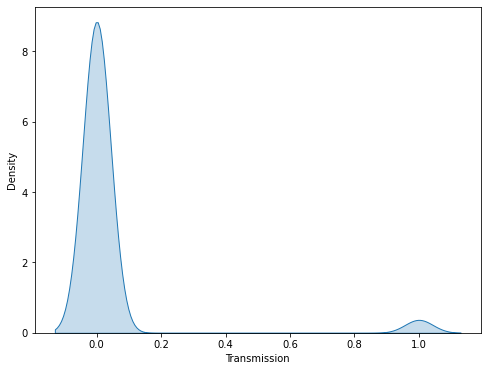

In [ ]:
make_kdeplot('Transmission')

There are many manual transmission type cars and very few automatic 

In [ ]:
df['Drivetrain'].unique()

array([' 2WD', ' 4WD'], dtype=object)

In [ ]:
df['Drivetrain']=df['Drivetrain'].replace([' 2WD',' 4WD'], [0,1]) 

In [ ]:
scatters('Drivetrain','Price')

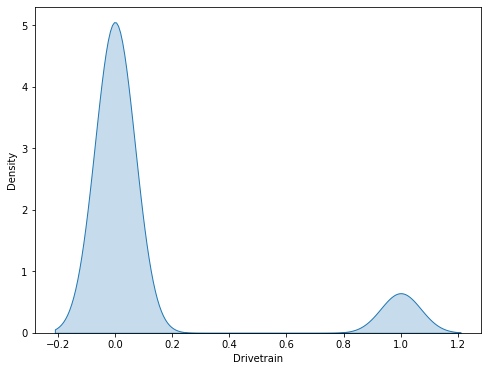

In [ ]:
make_kdeplot('Drivetrain')

From the figure it seems like there is more 2WD than 4WD. 

In [ ]:
df['Fuel_type'].unique()

array([' Petrol', ' Diesel'], dtype=object)

In [ ]:
df['Fuel_type']=df['Fuel_type'].replace([' Petrol', ' Diesel'],[0,1])

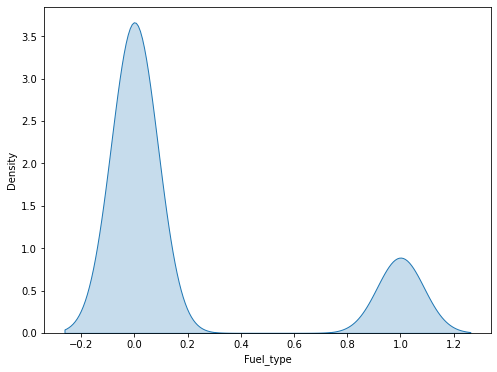

In [ ]:
make_kdeplot('Fuel_type')

There are more petrol fuel vehicle  than diesel fueled vehicle. The data seems to be imbalanced among its classes.

In [ ]:
df['Colour'].unique()

array([' golden', ' Grey', ' Sky Blue ', ' Green', ' Red/Maroon',
       ' Maroon', ' royal black', ' metalic sky blue', ' Golden Silver ',
       ' Red', ' Lilene Beige', ' White', ' Bue', ' Light Golden',
       ' Silver', ' Sky blue', ' golden silver', ' silver', ' Metallic',
       ' Golden', ' Gray', ' Black', ' WHITE', ' Platinum Metallic',
       ' Dark Gray', ' Blue', ' black', ' Chocolate Grey',
       ' Caviar Black ', ' SILVER', ' white ', '  Pearl Silver',
       ' orange ', ' Velvet Red', ' Beige', ' sky blue', ' Caviar Black',
       ' Lenin Beige', ' Sandive grey', ' Silver ', ' Cream Blue',
       ' Off white ', ' dark grey', ' maroon(red)', ' White ',
       ' Golden Grey', ' Moondust Silver', ' Mars Red', ' smoke grey',
       ' White Gold', ' Orange', ' Chilly Silver ', ' grey', ' white',
       ' Sea greay', ' Space gray', ' FROGEN WHITE', ' Paprika Red',
       ' Chill', ' Sea gray ', ' Sea Grey', ' Siver', ' Diamond white',
       ' Dark grey', ' silky silver', ' 

##### Actually Color would have more impact if the problem was about which car would get sold faster but it is about predicting the price  and color is personal preference and  has no role in determining the price of the car so I am removing the 'Colour' column

In [ ]:
df.drop(['Colour'],axis='columns',inplace=True)

In [ ]:
df['Brand'].unique(), len(df['Brand'].unique())

array(['Chevroletaveo', 'Chevroletcaptiva', 'Chevroletspark',
       'Chevroletbeat', 'Chevroletu-va', 'Chevroletuva', 'Chevroletsedan',
       'Fiatavventura', 'Fiatpunto', 'Fiatlinea', 'Fiatfigo', 'Fiatpalio',
       'Fordfigo', 'Fordecosport', 'Fordtitanium', 'Fordfiesta',
       'Fordranger', 'Hondacr-v', 'Hondacity', 'Hondajazz', 'Hondabrio',
       'Hondacivic', 'Hondacrv', 'Hyundaiaccent', 'Hyundaii10',
       'Hyundaisantro', 'Hyundaii20', 'Hyundaigetz', 'Hyundaiasta',
       'Hyundaitucson', 'Hyundaieon', 'Hyundaicreta', 'Hyundaielite',
       'Hyundaielantra', 'Hyundaisonata', 'Kiasephia', 'Kiasportage',
       'Kiapicanto', 'Kiario', 'Kiasoul', 'Kiacarens', 'Kiacerato',
       'Land Roverfreelander', 'Land Roverdiscovery',
       'Land Roverdefender', 'Mahindrabolero', 'MahindraKuv',
       'Mahindrascorpio', 'Maruti Suzukiswift', 'Maruti Suzukialto-800',
       'Maruti Suzukicelerio', 'Maruti Suzukialto-LXI',
       'Maruti SuzukiOmni', 'Maruti Suzuki800', 'Maruti Suzukieec

In [ ]:
df['Model'].unique(),len(df['Model'].unique())

KeyError: ignored

There are lot of classes in Brand and Models. 

###### Each brand have their own different models . Model and brand have  similar in terms of impact on buying cars.  so instead of two separate features we can change 'Brand' and 'Model' to one single feature.

In [ ]:
df['Brand']=df['Brand']+df['Model']

In [ ]:
df = df.drop(['Model'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model_year       1901 non-null   float64
 2   Transmission     1901 non-null   int64  
 3   Engine_size(cc)  1901 non-null   float64
 4   Drivetrain       1901 non-null   int64  
 5   Fuel_type        1901 non-null   int64  
 6   Kilometer        1901 non-null   float64
 7   Price            1901 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 133.7+ KB


In [ ]:
df[['Transmission','Kilometer','Price']] = df[['Transmission','Kilometer','Price']].apply(pd.to_numeric)
df.dtypes

Brand               object
Model_year         float64
Transmission         int64
Engine_size(cc)    float64
Drivetrain           int64
Fuel_type            int64
Kilometer          float64
Price                int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model_year       1901 non-null   float64
 2   Transmission     1901 non-null   int64  
 3   Engine_size(cc)  1901 non-null   float64
 4   Drivetrain       1901 non-null   int64  
 5   Fuel_type        1901 non-null   int64  
 6   Kilometer        1901 non-null   float64
 7   Price            1901 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 133.7+ KB


In [ ]:
# finding the top 20 categories
df.Brand.value_counts().sort_values(ascending=False).head(22)

Hyundaii10               214
Hyundaisantro            194
Maruti Suzukiswift       121
Fordfigo                  90
Maruti Suzukialto-800     86
Hyundaiasta               80
Maruti Suzukialto-LXI     72
Mahindrascorpio           66
Hyundaitucson             54
Kiasportage               50
Toyotacorolla             48
Kiapicanto                46
Tataindica                45
Volkswagenpolo            41
Hyundaii20                39
Hondacity                 33
Mahindrabolero            30
Chevroletaveo             29
Hyundaieon                29
Fordtitanium              27
Hyundaigetz               24
Hyundaiaccent             22
Name: Brand, dtype: int64

###### Top 15 car model which is maximum sold as a second hand car are:

In [ ]:
# make list with top 10 variables
top_15 = [x for x in df.Brand.value_counts().sort_values(ascending=False).head(15).index]
top_15

['Hyundaii10',
 'Hyundaisantro',
 'Maruti Suzukiswift',
 'Fordfigo',
 'Maruti Suzukialto-800',
 'Hyundaiasta',
 'Maruti Suzukialto-LXI',
 'Mahindrascorpio',
 'Hyundaitucson',
 'Kiasportage',
 'Toyotacorolla',
 'Kiapicanto',
 'Tataindica',
 'Volkswagenpolo',
 'Hyundaii20']

lets make top 15 classes of Brand as a separate features and include it in dataframe using One Hot encoding technique.

In [ ]:
for categories in top_15:
    df[categories]=np.where(df['Brand']==categories,1,0)
top_15.append('Brand')

In [ ]:
df[top_15][100:110] #we can verify the one hot encoding values with Brand classes

,Hyundaii10,Hyundaisantro,Maruti Suzukiswift,Fordfigo,Maruti Suzukialto-800,Hyundaiasta,Maruti Suzukialto-LXI,Mahindrascorpio,Hyundaitucson,Kiasportage,Toyotacorolla,Kiapicanto,Tataindica,Volkswagenpolo,Hyundaii20,Brand
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordecosport
101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordfiesta
102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordtitanium
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordecosport
104,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordecosport
106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordtitanium
107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fordfigo
108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordtitanium
109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fordecosport


In [ ]:
df.head() 

,Brand,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Kilometer,Price,Hyundaii10,Hyundaisantro,Maruti Suzukiswift,Fordfigo,Maruti Suzukialto-800,Hyundaiasta,Maruti Suzukialto-LXI,Mahindrascorpio,Hyundaitucson,Kiasportage,Toyotacorolla,Kiapicanto,Tataindica,Volkswagenpolo,Hyundaii20
0,Chevroletaveo,12,0,1150,0,0,200.0,975000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chevroletcaptiva,6,1,2000,1,1,100.0,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chevroletaveo,12,0,1150,0,0,42000.0,975000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chevroletcaptiva,11,1,2000,1,1,51000.0,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chevroletspark,9,0,1000,0,0,38000.0,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# now there is no use of Brand column so lets drop it out
df.drop(['Brand'], axis='columns', inplace=True)

In [ ]:
df.describe()

,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Kilometer,Price,Hyundaii10,Hyundaisantro,Maruti Suzukiswift,Fordfigo,Maruti Suzukialto-800,Hyundaiasta,Maruti Suzukialto-LXI,Mahindrascorpio,Hyundaitucson,Kiasportage,Toyotacorolla,Kiapicanto,Tataindica,Volkswagenpolo,Hyundaii20
count,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1.901000e+03,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000
mean,11.560231,0.039979,1420.210416,0.113098,0.195160,41094.897422,2.024845e+06,0.112572,0.102052,0.063651,0.047344,0.045239,0.042083,0.037875,0.034719,0.028406,0.026302,0.025250,0.024198,0.023672,0.021568,0.020516
std,4.098546,0.195961,507.546885,0.316796,0.396428,38439.454222,1.797278e+06,0.316152,0.302796,0.244194,0.212428,0.207883,0.200832,0.190944,0.183114,0.166174,0.160074,0.156924,0.153703,0.152064,0.145305,0.141793
min,2.000000,0.000000,624.000000,0.000000,0.000000,100.000000,2.011000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1100.000000,0.000000,0.000000,25000.000000,1.190000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,1200.000000,0.000000,0.000000,36000.000000,1.575000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,0.000000,1600.000000,0.000000,0.000000,50000.000000,2.400000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.000000,1.000000,4400.000000,1.000000,1.000000,800000.000000,3.200000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(1901, 22)

### Model Building